목차
1. 분류분석 평가 방법들
1. https://scikit-learn.org/stable/modules/model_evaluation.html


In [19]:
print(range(2,40,2))

range(2, 40, 2)


In [20]:
(2,40,2)

(2, 40, 2)

교차 검증  
https://m.blog.naver.com/ckdgus1433/221599517834

교차 검증을 왜 사용하는가?
- Train / Test 으로 나누게 되면 Test 는 모델링에 반영되지 않음
- 제공된 모든 데이터를 Train으로 사용하고자 함
- Train / Test 으로 한번만 나누지 말고, 동적으로 여러가지 케이스로 나누고, 학습, 검증
- 나눠진 Test 케이스가 모든 데이터를 포함할 때까지 반복
- 계산량이 많아짐

1. 데이터셋
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTg4/MDAxNTY0MDU5OTMyMzMy.xptymihN3pg06c5NgVEw6UHWzxeukdnQjSKHNaE3uosg.PQNoW2yYZuVMeRmzY8Daxp8msWCgrdLlsa1pmiqMxvEg.PNG.ckdgus1433/image.png?type=w800)

1. 홀드아웃
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMjUw/MDAxNTY0MDY0MjA3NTk1.iOrZkLYld_wuQ51TjJPpdiQcISFG3KeukqD1OuEfSP0g.e4tmacb2eMG19lDbGlIJ91dmukNe1R_3zZLsMfDXuN8g.PNG.ckdgus1433/image.png?type=w800)

1. k-fold
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTYz/MDAxNTY0MDY1ODk4NTM0.HiTh5fw3_Fulbq6dv1iLrxS7EmEM4htsWC-5fh-TiGAg.5rbp2nHtWYOZvzoN-Kl4mCKF4nZ4rd5bmO_IDh-sieAg.PNG.ckdgus1433/image.png?type=w800)

1. 리브-p-아웃 교차 검증 
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjZfNCAg/MDAxNTY0MDY4NzA4MTEy.WMv-qZ490weZMjteert-trU-zIXBeX6wUs19A0Fo5RAg.KqxSpltjlbeYUTjj1d_V-HdPjYlzms_pKUmsJ1PipL0g.PNG.ckdgus1433/image.png?type=w800)

1. k-fold + stratify
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjlfMiAg/MDAxNTY0NDA5MTY4MTkw.IlCY5_N8e3Qw1lU5DDufL0G1DYzIoWRgBDLlr4BY9JAg.qlE19XgVRk2CcFYTYZ7zHcuKtKjh8eQ-a4WYPhpE7V4g.PNG.ckdgus1433/image.png?type=w800)

# 평가 방법 (지도 학습)
- 오분류표 (confusion matrix)
- 분석지표  
print("Acuuracy : ", accuracy_score(y_test, y_pred))  
print("Sensitivity(recall) : ", recall_score(y_test, y_pred))  
print("precision_score : ", precision_score(y_test, y_pred))  
print("f1_score : ", f1_score(y_test, y_pred))  
- ROC 그래프  
roc_auc_score(y_test,y_pred_proba)

> https://scikit-learn.org/stable/modules/model_evaluation.html
>

## 분류 분석

### 로지스틱 회귀분석
* 타이타닉 survived (0과 1의 값을 가짐) 예측

In [1]:
import pandas as pd
import numpy as np

df_t = pd.read_csv("/Users/hmc/Documents/GitHub/ADP/class101/data/titanic.csv")
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


X: pclass, age, sibsp, parch, fare, adult_male  
y: survived

In [2]:
df_t = df_t.dropna()
y = df_t[['survived']]
X = df_t[['pclass', 'age', 'sibsp', 'parch', 'fare']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7,
                                                   test_size = 0.3, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(498, 5) (214, 5) (498, 1) (214, 1)


In [3]:
X

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
885,3,39.0,0,5,29.1250
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
889,1,26.0,0,0,30.0000


In [4]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.592323
         Iterations 6


In [5]:
# 오분류표

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

y_predict = result.predict(X_test[result.params.index])
y_predict = round(y_predict)
cm = confusion_matrix(y_test,y_predict)
print(cm)
print("TN, FP")
print("FN, TP")

[[113  14]
 [ 63  24]]
TN, FP
FN, TP


    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.


In [7]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [8]:
# 분석 지표

In [9]:
# survived의 예측값 (0 또는 1)
y_pred = round(result.predict(X_test))
y_pred.value_counts()

0.0    176
1.0     38
dtype: int64

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

print(cm)
print("TN, FP")
print("FN, TP")
print("\n")
print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("옳게 예측한 확률, TP+TN / TOTAL \n")

print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
print("True Positive Rate \n")

print("precision_score : ", precision_score(y_test, y_pred))
print("정밀도, TP / TP + FP\n")

print("f1_score : ", f1_score(y_test, y_pred))
print("2 * recall * precision / (recall + precision)")
print("불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 훨씬 많음 = TN, FP 갯수가 높음")

[[113  14]
 [ 63  24]]
TN, FP
FN, TP


Acuuracy :  0.6401869158878505
옳게 예측한 확률, TP+TN / TOTAL 

Sensitivity(recall) :  0.27586206896551724
True Positive Rate 

precision_score :  0.631578947368421
정밀도, TP / TP + FP

f1_score :  0.384
2 * recall * precision / (recall + precision)
불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 훨씬 많음 = TN, FP 갯수가 높음


![python image2](https://mblogthumb-phinf.pstatic.net/20160517_61/ministyle7_1463464259433dFuKs_JPEG/%BB%EA%BC%FA%B1%E2%C7%CF%C6%F2%B1%D5.jpg?type=w2)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       127
           1       0.63      0.28      0.38        87

    accuracy                           0.64       214
   macro avg       0.64      0.58      0.56       214
weighted avg       0.64      0.64      0.60       214



In [11]:
# 교차 검증

In [12]:
# 에스티메이터는 sklearn 객체만 가능함!
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# 파라미터는 (모델, Traingdata의 feature, Trainingdata의 target, 폴드수) 이다.
scores = cross_val_score(model, X , y ,cv=5)

# Trainingdata에 대한 성능을 나타낸다.
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

#https://wooono.tistory.com/105
#https://scikit-learn.org/stable/modules/cross_validation.html

교차 검증별 정확도: [0.6084 0.6993 0.7254 0.7254 0.6972]
평균 검증 정확도: 0.6911


/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A colu

In [ ]:
#model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [13]:
# ROC 커브

cm  
[92 18]  
[21 48]]

TN FP  
FN TP

ROC 커브 그릴때는 확률값임 (prob)
>In the binary case, it corresponds to an array of shape (n_samples,). **Both probability estimates and non-thresholded decision values can be provided.** The probability estimates correspond to the probability of the class with the greater label, i.e. estimator.classes_[1] and thus estimator.predict_proba(X, y)[:, 1]. The decision values corresponds to the output of estimator.decision_function(X, y). See more information in the User guide;

>In the multiclass case, it corresponds to an array of shape (n_samples, n_classes) of **probability estimates provided by the predict_proba method.** The probability estimates must sum to 1 across the possible classes. In addition, the order of the class scores must correspond to the order of labels, if provided, or else to the numerical or lexicographical order of the labels in y_true. See more information in the User guide;

>In the multilabel case, it corresponds to an array of shape (n_samples, n_classes). **Probability estimates are provided by the predict_proba method and the non-thresholded decision values by the decision_function method.** The probability estimates correspond to the probability of the class with the greater label for each output of the classifier. See more information in the User guide.

"non-thresholded decision values" 0 또는 1 값 아님  
>You might be confused by the term "non-thresholded decision-values" but this does not describe predicted labels (rather decision functions like the ones you can find on support vector classification  
>https://stackoverflow.com/questions/65275314/confusion-on-sklearns-roc-auc-score-method
>

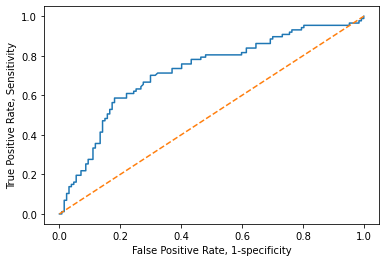

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#확률값
y_pred_proba = result.predict(X_test)

fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate, 1-specificity")
plt.ylabel("True Positive Rate, Sensitivity")
plt.show()

In [15]:
# ROC 커브 아래 면적
from sklearn.metrics import roc_auc_score

y_pred_proba = result.predict(X_test)
print("roc_auc_score: ", roc_auc_score(y_test,y_pred_proba))

roc_auc_score:  0.7213322472621956


#### 정리
* 필요한것
    * model (sm, sklearn)
    * confusion matrix
    * 분석지표 (scores)
    * ROC 커브
    * AUC_ROC_SCORE
* 교차 검증 (sklearn)
    * k-fold

### 의사결정나무

### 앙상블

#### 배깅

#### 랜덤포레스트

#### 부스팅

### 나이브베이즈 분류

### KNN 분류기

### SVM 분류기

### 인공신경망 분류

## 회귀 분석